## Load Data

In [1]:
data_path = '../data/Iris.csv'

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Get Descriptive Statistics of Data

In [5]:
from pandas_summary import DataFrameSummary

In [6]:
DataFrameSummary(data).summary()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150,150,150,150,150,NaN
mean,75.5,5.84333,3.054,3.75867,1.19867,NaN
std,43.4454,0.828066,0.433594,1.76442,0.763161,NaN
min,1,4.3,2,1,0.1,NaN
25%,38.25,5.1,2.8,1.6,0.3,NaN
50%,75.5,5.8,3,4.35,1.3,NaN
75%,112.75,6.4,3.3,5.1,1.8,NaN
max,150,7.9,4.4,6.9,2.5,NaN
counts,150,150,150,150,150,150
uniques,150,35,23,43,22,3


## Identify Inputs and Output

In [7]:
output_var = ['Species']
input_vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [8]:
data_X = data[input_vars]
data_y = data[output_var]

## Stratified Split to Train and Test Parts

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=None, stratify = data_y, shuffle = True)

In [16]:
train_y = np.squeeze(np.array(train_y))
test_y = np.squeeze(np.array(test_y))

In [17]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## Build Decision Tree to Classify Flowers

In [12]:
from sklearn import tree

In [13]:
clf = tree.DecisionTreeClassifier()

In [14]:
clf = clf.fit(train_X, train_y)

## Evaluate Decision Tree with Test Data

In [20]:
y_true = test_y

In [18]:
y_pred = clf.predict(test_X)

In [19]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [21]:
y_pred == y_true

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

## Plot Decision Tree

In [23]:
import graphviz

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None)

In [26]:
graph = graphviz.Source(dot_data) 

In [28]:
input_vars

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [39]:
list(set(train_y))

['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']

In [40]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=input_vars,  
                         class_names=list(set(train_y)),  
                         filled=True, rounded=True,  
                         special_characters=True)  

In [41]:
graph = graphviz.Source(dot_data)  

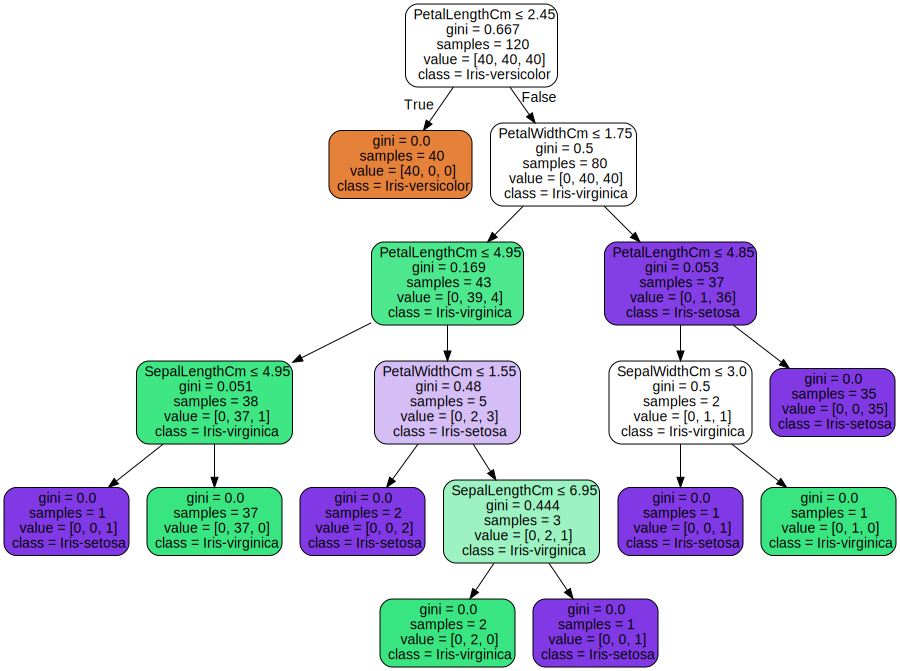

In [42]:
graph

In [45]:
list(zip(input_vars, clf.feature_importances_))

[('SepalLengthCm', 0.041008771929824536),
 ('SepalWidthCm', 0.012499999999999999),
 ('PetalLengthCm', 0.5481798934797713),
 ('PetalWidthCm', 0.3983113345904043)]

## Other Tests

In [29]:
from sklearn.datasets import load_iris

In [30]:
iris = load_iris()

In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')